IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

DATA COLLECTING

In [ ]:
import pandas as pd

# Membaca dataset
file_path = "/content/sample_data/diabetes_prediction_dataset.csv"
data = pd.read_csv(file_path)

# Menampilkan informasi dasar dataset
print("Informasi dataset:")
print(data.info())

# Menampilkan statistik deskriptif dari dataset
data.describe(include="all")

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [ ]:
# Mengecek nilai kosong
print("\nJumlah nilai kosong per kolom:")
print(data.isnull().sum())


Jumlah nilai kosong per kolom:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


EDA (EXPLORATORY DATA ANALYSYS)

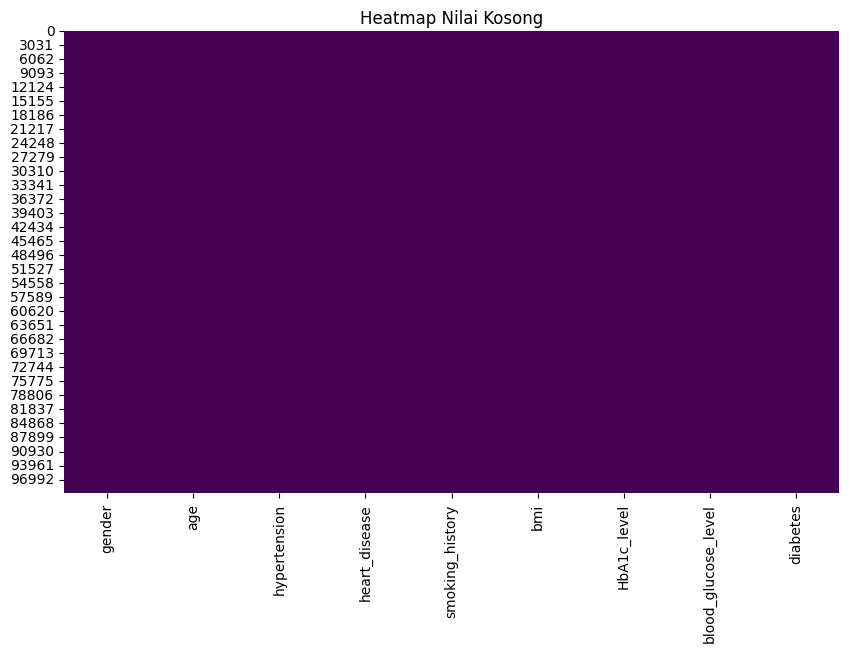

In [ ]:
# Visualisasi nilai kosong
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap Nilai Kosong")
plt.show()

<Figure size 1500x1000 with 0 Axes>

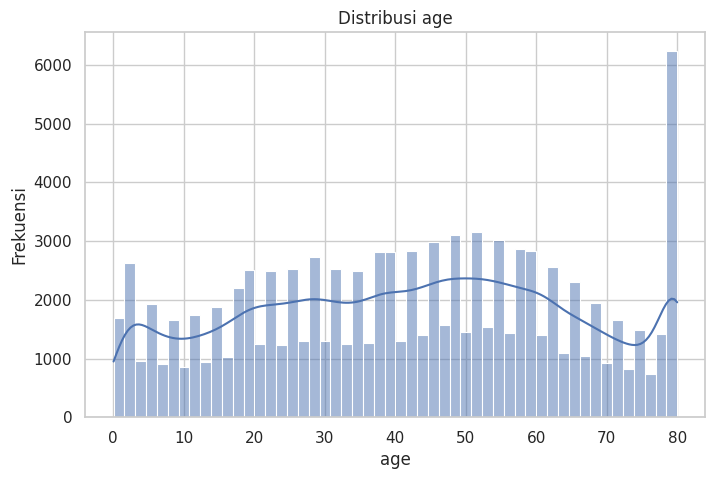

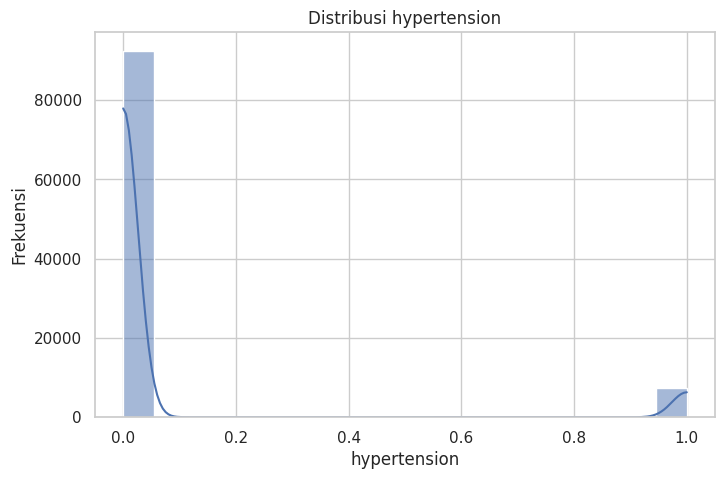

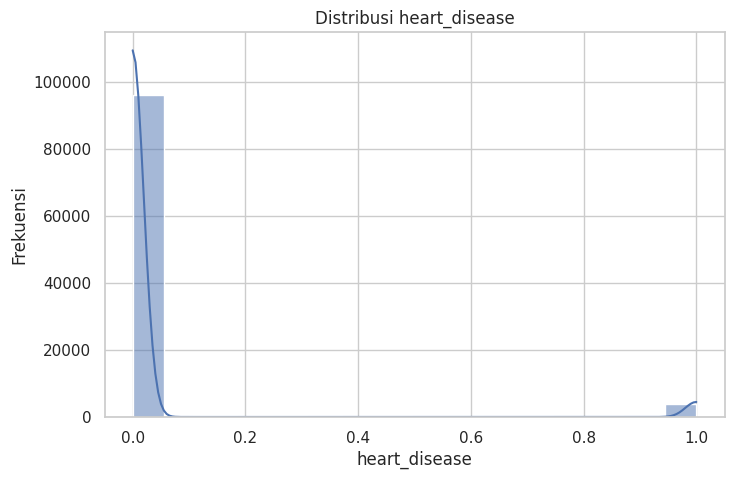

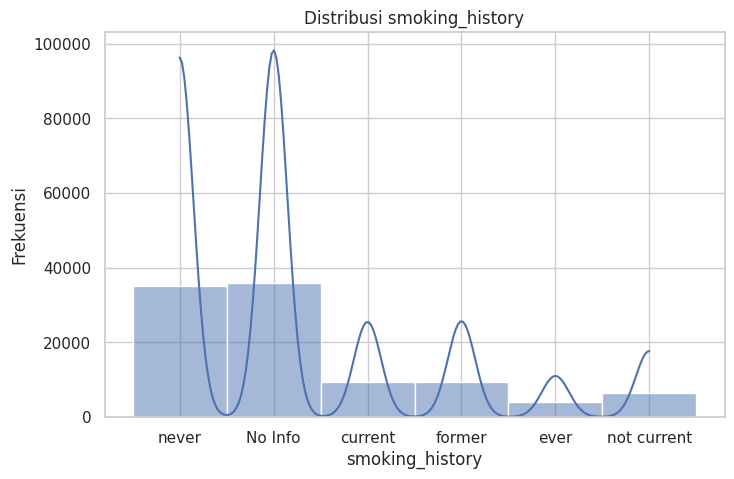

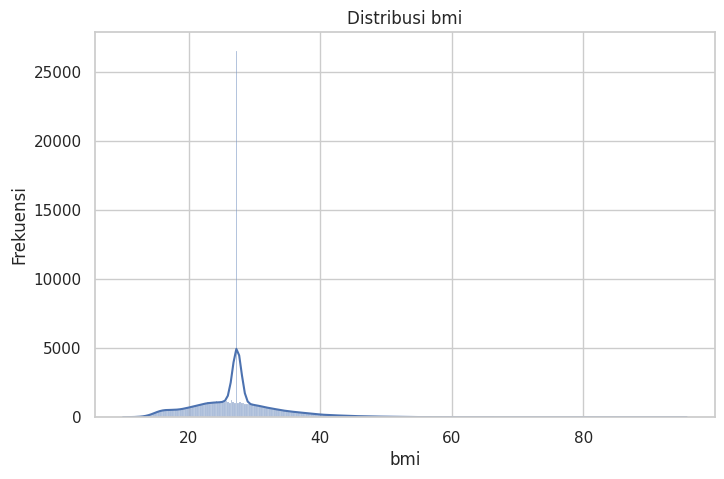

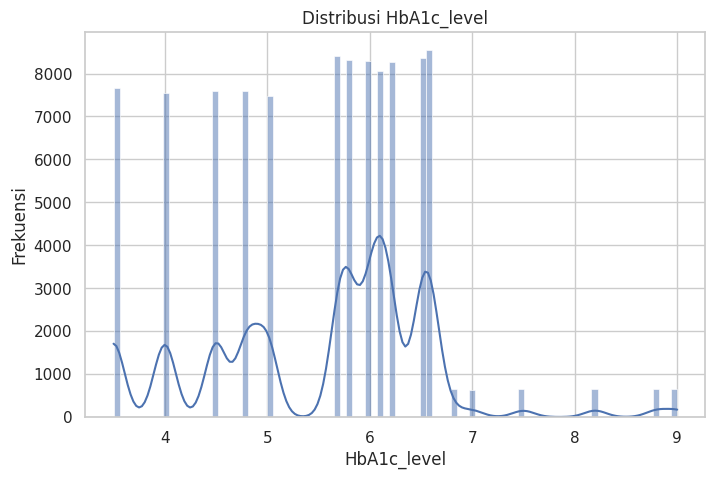

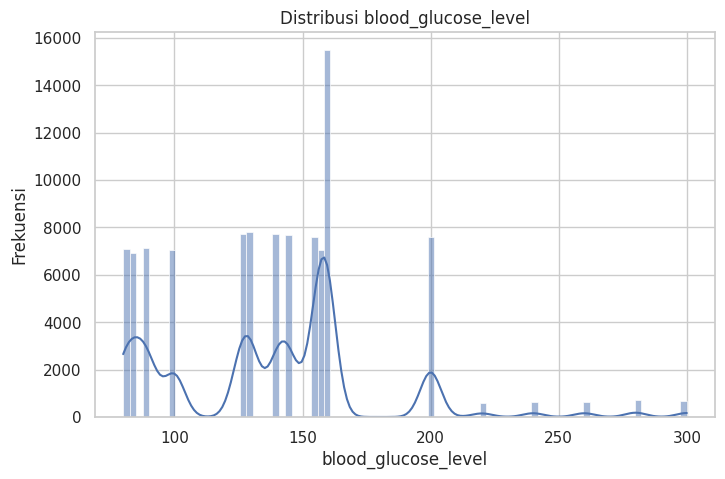

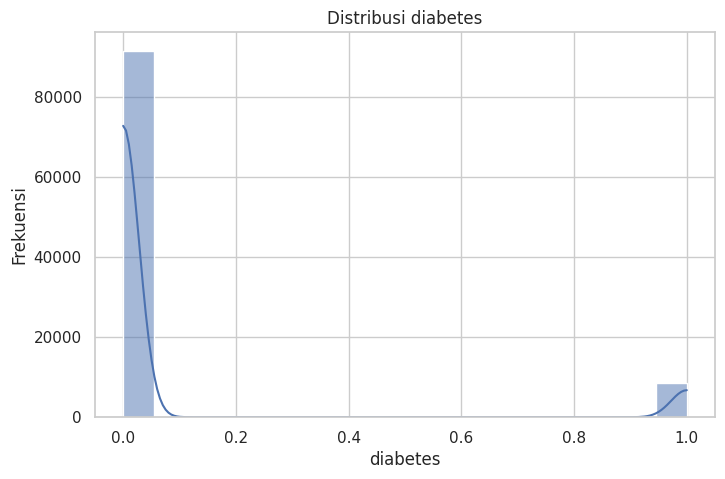

In [ ]:
# Distribusi fitur numerik
# Mengatur gaya visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Variabel numerik yang akan divisualisasikan
numerical_columns = ['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

# Membuat histogram untuk setiap variabel numerik
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()

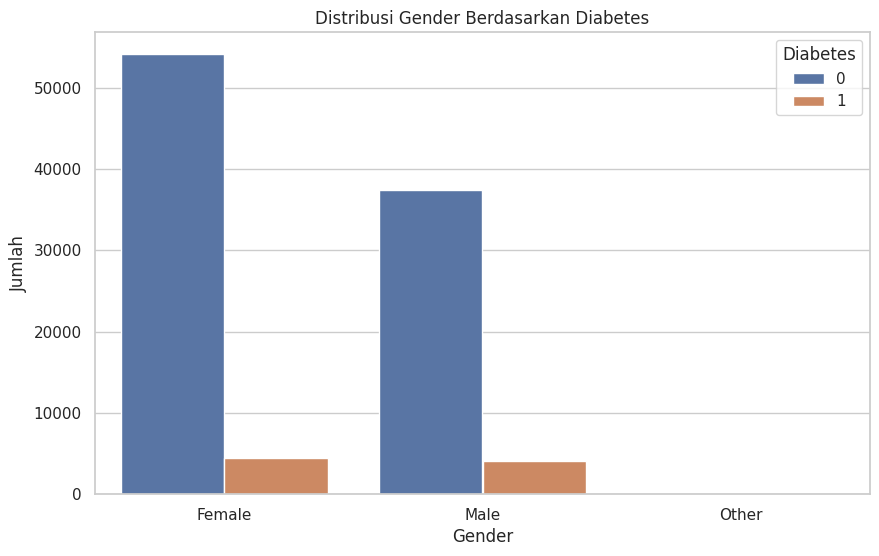

In [ ]:
# Visualisasi distribusi variabel kategorikal (gender) berdasarkan status diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gender', hue='diabetes')
plt.title('Distribusi Gender Berdasarkan Diabetes')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.legend(title='Diabetes')
plt.show()

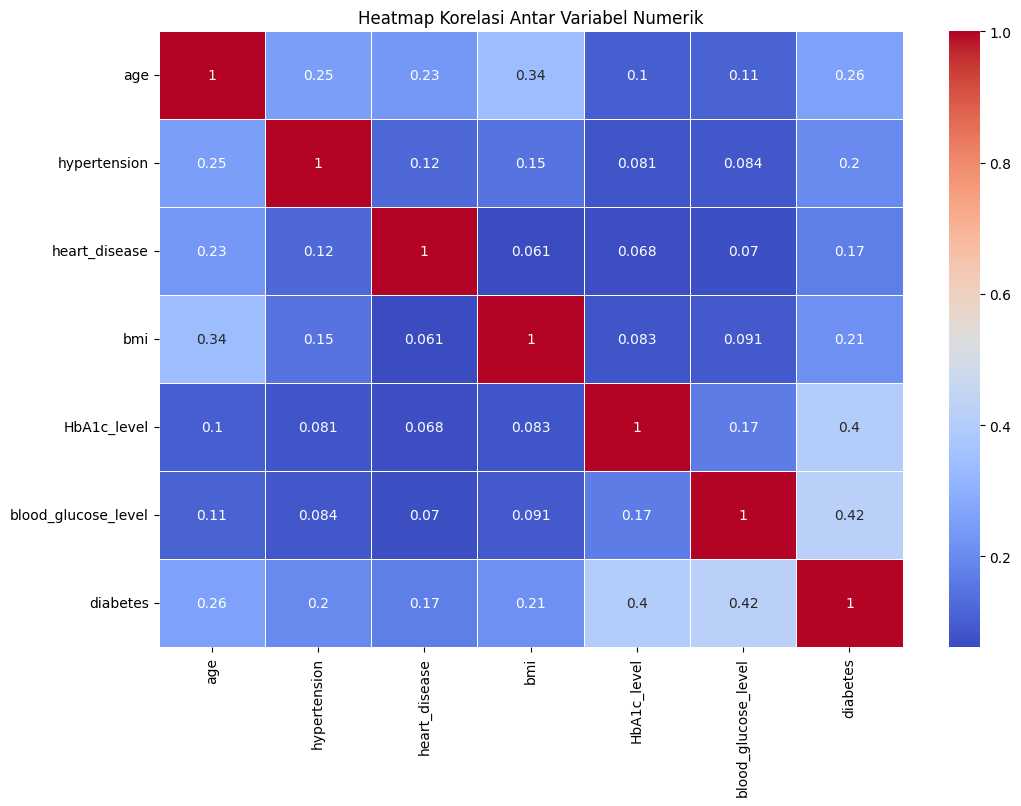

In [ ]:
# Mengambil hanya kolom numerik dari dataset
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Membuat heatmap korelasi hanya untuk kolom numerik
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

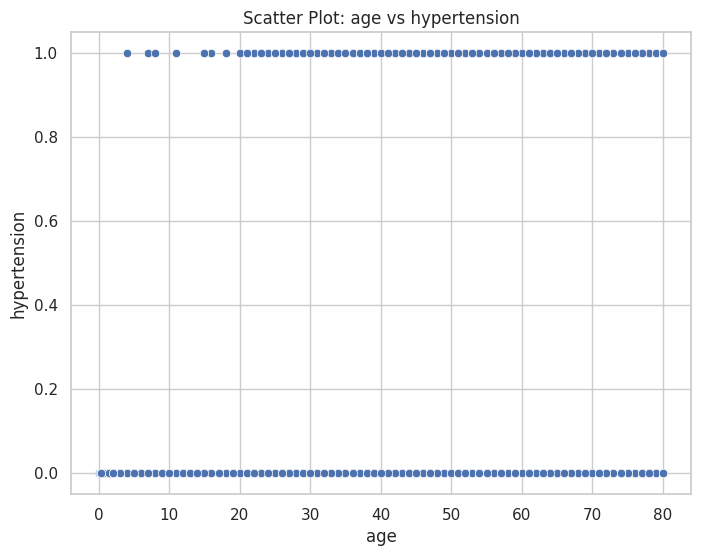

In [ ]:
# 5. Visualisasi Hubungan Antar Variabel
# Contoh scatter plot untuk dua kolom numerik pertama
if len(numerical_columns) > 1:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=numerical_columns[0], y=numerical_columns[1])
    plt.title(f"Scatter Plot: {numerical_columns[0]} vs {numerical_columns[1]}")
    plt.show()

<ipython-input-25-f88d591a129a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


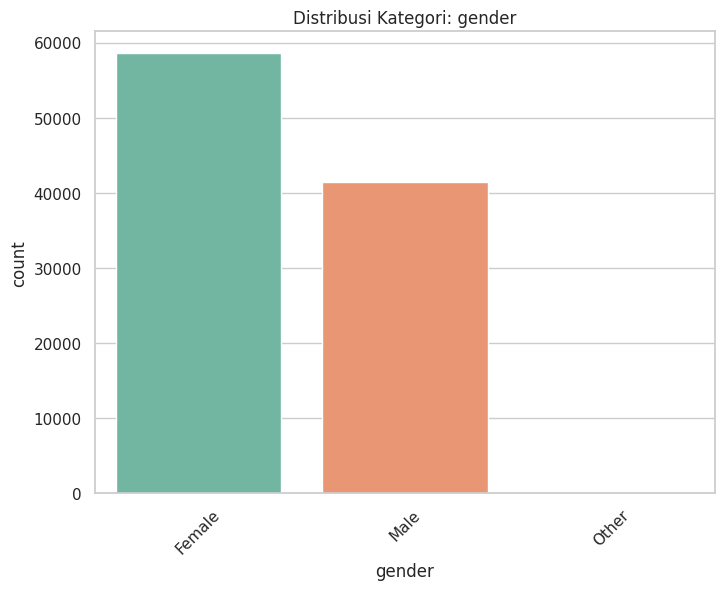

<ipython-input-25-f88d591a129a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")


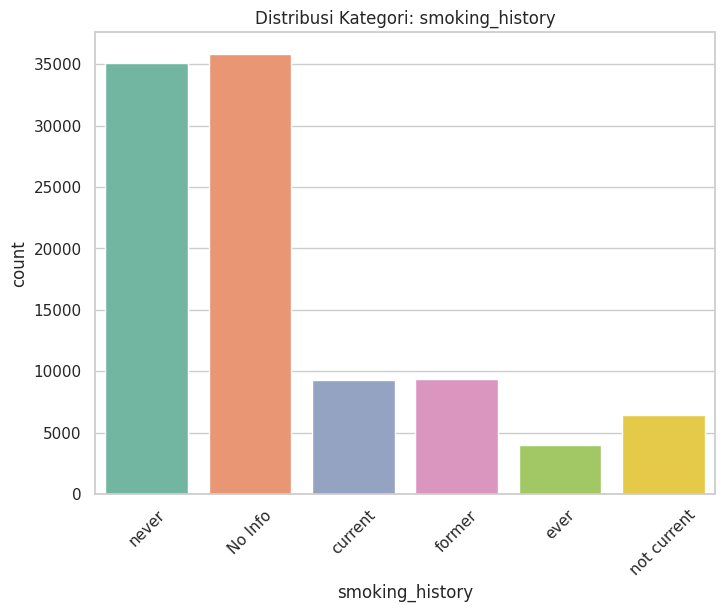

In [ ]:
# 6. Analisis Kategori non numerik
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col, palette="Set2")
    plt.title(f"Distribusi Kategori: {col}")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# 7. Penanganan Nilai Kosong (Jika Ada)
# Contoh: Mengisi nilai kosong dengan rata-rata (untuk kolom numerik)
for col in numerical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)
# Mengisi nilai kosong pada kolom kategori dengan modus
for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

print("\nDataset setelah penanganan nilai kosong:")
print(data.isnull().sum())


Dataset setelah penanganan nilai kosong:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


PREPROCESSING DATA

In [ ]:
# 1. Mengimpor library yang diperlukan
from sklearn.impute import SimpleImputer
import pandas as pd

# Membaca dataset
file_path = "/content/sample_data/diabetes_prediction_dataset.csv"
data = pd.read_csv(file_path)

# Menampilkan informasi tentang nilai kosong
print("\nNilai kosong sebelum penanganan:")
print(data.isnull().sum())

# Penanganan Nilai Kosong
# Untuk kolom numerik, kita isi dengan rata-rata (mean)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Untuk kolom kategori, kita isi dengan modus (nilai terbanyak)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

print("\nNilai kosong setelah penanganan:")
print(data.isnull().sum())



Nilai kosong sebelum penanganan:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Nilai kosong setelah penanganan:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# 2.  Pembersihan Data (Data Cleaning) Pembersihan Data: Menghapus Duplikasi
data.drop_duplicates(inplace=True)

# Periksa jika ada baris duplikat yang telah dihapus
print("\nJumlah baris setelah menghapus duplikasi:", data.shape[0])

# Cek tipe data untuk memastikan tidak ada data yang salah format
print("\nTipe data setiap kolom:")
print(data.dtypes)



Jumlah baris setelah menghapus duplikasi: 96146

Tipe data setiap kolom:
gender                  object
age                    float64
hypertension           float64
heart_disease          float64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes               float64
dtype: object


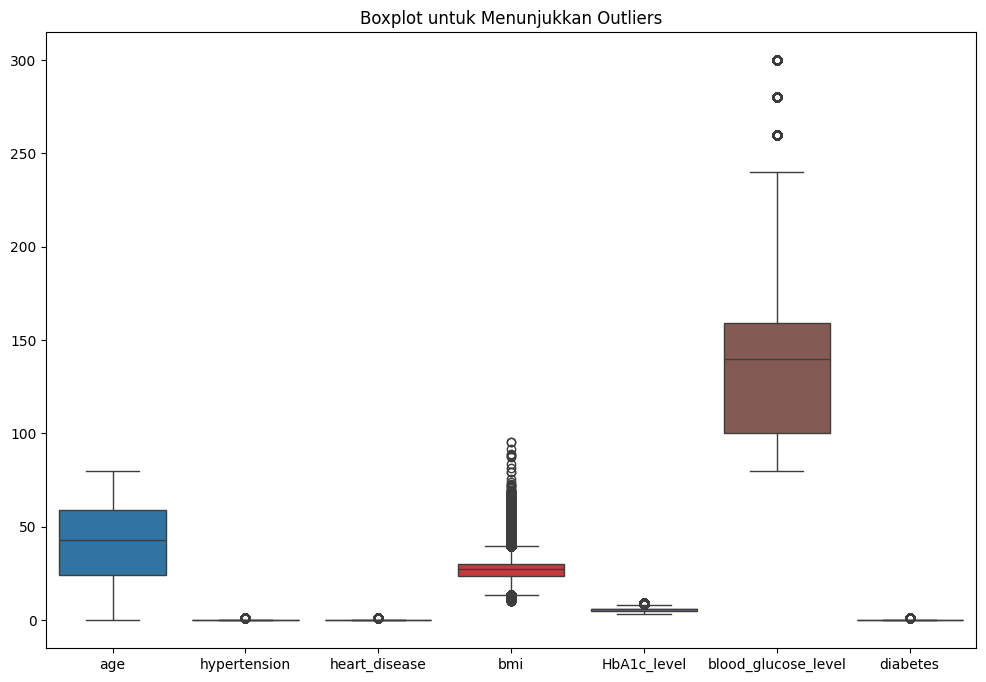


Jumlah outliers berdasarkan IQR (untuk setiap kolom):
age                       0
hypertension           7461
heart_disease          3923
bmi                    5354
HbA1c_level            1312
blood_glucose_level    2031
diabetes               8482
dtype: int64


In [ ]:
#3. Mengetahui OUTLIERS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Menyusun fitur dan target untuk deteksi outliers
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# 1. Menghitung IQR untuk mendeteksi outliers
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outliers
    outliers = (df < lower_bound) | (df > upper_bound)
    return outliers

# Mendeteksi outliers untuk kolom numerik
outliers_iqr = data[numeric_columns].apply(detect_outliers_iqr)

# 2. Visualisasi Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot untuk Menunjukkan Outliers')
plt.show()

# 3. Tampilkan jumlah outliers berdasarkan IQR
outliers_count_iqr = outliers_iqr.sum()
print(f"\nJumlah outliers berdasarkan IQR (untuk setiap kolom):\n{outliers_count_iqr}")


In [ ]:
import pandas as pd
#4. Menangani Outliers

def handle_outliers_iqr(data):
    # Menghitung Q1 (25th percentile) dan Q3 (75th percentile)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Menghitung IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengidentifikasi outliers berdasarkan batas bawah dan atas
    is_outlier = (data < lower_bound) | (data > upper_bound)

    # Mengembalikan data yang sudah ditangani outliers-nya
    # Mengganti outliers dengan nilai batas (lower/upper bound)
    data_no_outliers = data.clip(lower=lower_bound, upper=upper_bound)

    return data_no_outliers, is_outlier

# Misalkan 'data' adalah dataset Anda, dan kita ingin menangani outliers pada kolom-kolom numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Menangani outliers untuk setiap kolom numerik
for column in numerical_columns:
    data[column], outliers = handle_outliers_iqr(data[column])

    # Menampilkan jumlah outliers yang ditemukan untuk setiap kolom
    print(f"Jumlah outliers pada kolom '{column}': {outliers.sum()}")

# Menampilkan data setelah menangani outliers
print(data.head())



Jumlah outliers pada kolom 'age': 0
Jumlah outliers pada kolom 'hypertension': 7461
Jumlah outliers pada kolom 'heart_disease': 3923
Jumlah outliers pada kolom 'bmi': 5354
Jumlah outliers pada kolom 'HbA1c_level': 1312
Jumlah outliers pada kolom 'blood_glucose_level': 2031
Jumlah outliers pada kolom 'diabetes': 8482
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0           0.0            0.0           never  25.19   
1  Female  54.0           0.0            0.0         No Info  27.32   
2    Male  28.0           0.0            0.0           never  27.32   
3  Female  36.0           0.0            0.0         current  23.45   
4    Male  76.0           0.0            0.0         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                140.0       0.0  
1          6.6                 80.0       0.0  
2          5.7                158.0       0.0  
3          5.0                155.0       0.0  
4          4.8 

In [ ]:
#5.Konversi Tipe Data (Data Type Conversion)

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Memuat dataset Anda
data = pd.read_csv('/content/sample_data/diabetes_prediction_dataset.csv')

# Identifikasi kolom kategori
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
label_encoders = {}

# Loop untuk setiap kolom kategori
for col in categorical_columns:
    le = LabelEncoder()  # Membuat objek LabelEncoder
    data[col] = le.fit_transform(data[col])  # Mengonversi kolom menjadi angka
    label_encoders[col] = le  # Menyimpan encoder untuk penggunaan di masa depan
    print(f"Kategori pada '{col}': {list(le.classes_)}")  # Menampilkan kategori asli yang telah di-encode


Kategori pada 'gender': ['Female', 'Male', 'Other']
Kategori pada 'smoking_history': ['No Info', 'current', 'ever', 'former', 'never', 'not current']


In [ ]:
#6.  Normalisasi atau Standarisasi Data Numerik

from sklearn.preprocessing import StandardScaler

# Identifikasi kolom numerik
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Standarisasi data numerik menggunakan StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nData setelah standarisasi:")
print(data.head())



Data setelah standarisasi:
     gender       age  hypertension  heart_disease  smoking_history       bmi  \
0 -0.841047  1.692704     -0.284439       4.936379         0.963327 -0.321056   
1 -0.841047  0.538006     -0.284439      -0.202578        -1.153468 -0.000116   
2  1.187234 -0.616691     -0.284439      -0.202578         0.963327 -0.000116   
3 -0.841047 -0.261399     -0.284439      -0.202578        -0.624269 -0.583232   
4  1.187234  1.515058      3.515687       4.936379        -0.624269 -1.081970   

   HbA1c_level  blood_glucose_level  diabetes  
0     1.001706             0.047704 -0.304789  
1     1.001706            -1.426210 -0.304789  
2     0.161108             0.489878 -0.304789  
3    -0.492690             0.416183 -0.304789  
4    -0.679490             0.416183 -0.304789  


In [ ]:
#7. Pembagian Data (Train-Test Split)
from sklearn.model_selection import train_test_split

target_column = 'diabetes'  # nama kolom target
X = data.drop(columns=[target_column])  # Fitur
y = data[target_column]  # Target

# Membagi data menjadi data latih dan data uji (80:20) dengan stratified sampling
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan distribusi kelas sebelum dan setelah pembagian
print("Distribusi kelas pada y (target) sebelum pembagian:")
print(y.value_counts())

print("\nDistribusi kelas pada y_latih setelah pembagian:")
print(y_latih.value_counts())

print("\nDistribusi kelas pada y_uji setelah pembagian:")
print(y_uji.value_counts())

# Menampilkan shape dari data latih dan data uji
print("\nShape data:")
print(f"Data latih: {X_latih.shape}, Data Uji: {X_uji.shape}")


Distribusi kelas pada y (target) sebelum pembagian:
diabetes
-0.304789    91500
 3.280961     8500
Name: count, dtype: int64

Distribusi kelas pada y_latih setelah pembagian:
diabetes
-0.304789    73200
 3.280961     6800
Name: count, dtype: int64

Distribusi kelas pada y_uji setelah pembagian:
diabetes
-0.304789    18300
 3.280961     1700
Name: count, dtype: int64

Shape data:
Data latih: (80000, 8), Data Uji: (20000, 8)


In [ ]:
#8. Menampilkan jumlah data latih dan data uji
print(f"Jumlah data latih (X_latih): {X_latih.shape[0]}")
print(f"Jumlah data uji (X_uji): {X_uji.shape[0]}")
print(f"Jumlah target latih (y_latih): {y_latih.shape[0]}")
print(f"Jumlah target uji (y_uji): {y_uji.shape[0]}")


Jumlah data latih (X_latih): 80000
Jumlah data uji (X_uji): 20000
Jumlah target latih (y_latih): 80000
Jumlah target uji (y_uji): 20000


In [ ]:
from sklearn.model_selection import train_test_split

# Menentukan fitur (X) dan target (y)
X = data.drop(columns=['diabetes'])  # Pastikan kolom target adalah 'diabetes'
y = data['diabetes']

# Membagi dataset ke dalam data latih (80%) dan data uji (20%)
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data latih dan data uji
train_percentage = len(X_latih) / len(data) * 100
test_percentage = len(X_uji) / len(data) * 100

print(f"Persentase Data Latih: {train_percentage:.2f}% ({len(X_latih)} baris)")
print(f"Persentase Data Uji: {test_percentage:.2f}% ({len(X_uji)} baris)")



Persentase Data Latih: 80.00% (80000 baris)
Persentase Data Uji: 20.00% (20000 baris)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#9. Visualisasi distribusi target (Outcome)
plt.figure(figsize=(8, 4))
sns.countplot(x='diabetes', data=data, palette='viridis')
plt.title('Distribusi Variabel Target (diabetes)')
plt.show()


NameError: name 'data' is not defined

<Figure size 800x400 with 0 Axes>

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd


Jumlah data latih setelah SMOTE (X_latih_resampled): 146416
Jumlah target latih setelah SMOTE (y_latih_resampled): 146416
Jumlah data latih setelah SMOTE (X_latih_resampled): 146416
Jumlah target latih setelah SMOTE (y_latih_resampled): 146416


<ipython-input-34-3778cff0c322>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_latih_resampled, palette='viridis')


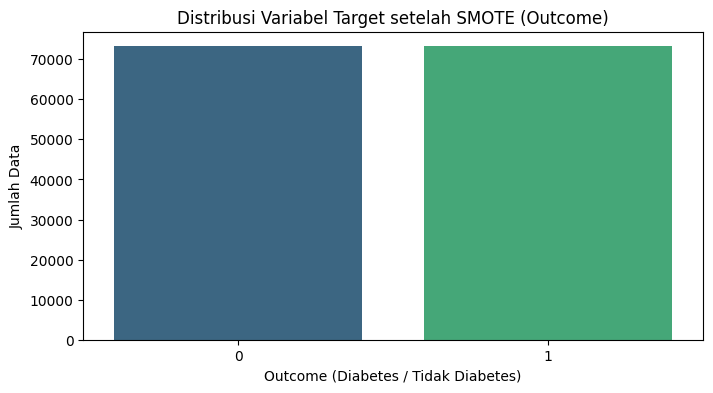

In [ ]:
#10. Menggunakan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_latih_resampled, y_latih_resampled = smote.fit_resample(X_latih, y_latih)

# Menampilkan jumlah data setelah SMOTE
print(f"Jumlah data latih setelah SMOTE (X_latih_resampled): {X_latih_resampled.shape[0]}")
print(f"Jumlah target latih setelah SMOTE (y_latih_resampled): {y_latih_resampled.shape[0]}")

# Menampilkan jumlah data setelah SMOTE
print(f"Jumlah data latih setelah SMOTE (X_latih_resampled): {X_latih_resampled.shape[0]}")
print(f"Jumlah target latih setelah SMOTE (y_latih_resampled): {y_latih_resampled.shape[0]}")

# Visualisasi distribusi target setelah SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x=y_latih_resampled, palette='viridis')
plt.title('Distribusi Variabel Target setelah SMOTE (Outcome)')
plt.xlabel('Outcome (Diabetes / Tidak Diabetes)')
plt.ylabel('Jumlah Data')
plt.show()

In [ ]:
print(y_latih_resampled.value_counts())

diabetes
0    73208
1    73208
Name: count, dtype: int64


In [ ]:
print(y_latih_resampled.value_counts())


diabetes
0    73208
1    73208
Name: count, dtype: int64


MODELTRAINING

In [ ]:
# Melatih model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_latih_resampled, y_latih_resampled)

RandomForestClassifier(random_state=42)

In [ ]:

# Prediksi menggunakan model Random Forest
y_pred = rf.predict(X_uji)

# Menghitung confusion matrix
cm = confusion_matrix(y_uji, y_pred)

# Mengambil komponen confusion matrix
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Menghitung metrik evaluasi menggunakan rumus matematika
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil evaluasi
print("Confusion Matrix:")
print(cm)
print(f"\nAkurasi: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Confusion Matrix:
[[17907   385]
 [  435  1273]]

Akurasi: 0.9590
Precision: 0.7678
Recall: 0.7453
F1-Score: 0.7564


Confusion Matrix:
[[17907   385]
 [  435  1273]]

Akurasi: 0.9590
Precision: 0.7678
Recall: 0.7453
F1-Score: 0.7564
Specificity: 0.9790


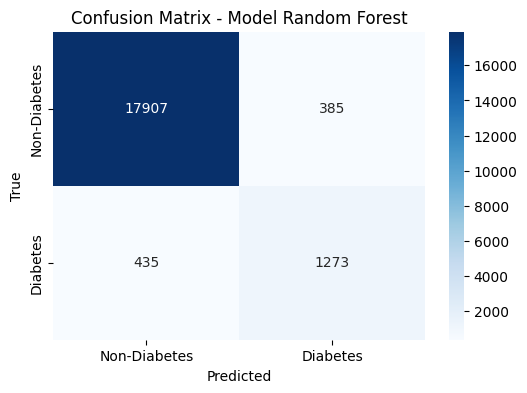

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_uji, y_pred)

# Mengambil komponen confusion matrix
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Menghitung metrik evaluasi menggunakan rumus matematika
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Menambahkan perhitungan Specificity
specificity = TN / (TN + FP)

# Menampilkan hasil evaluasi
print("Confusion Matrix:")
print(cm)
print(f"\nAkurasi: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Specificity: {specificity:.4f}")

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - Model Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Confusion Matrix - Decision Tree:
[[17646   646]
 [  420  1288]]

Akurasi: 0.9467
Precision: 0.6660
Recall: 0.7541
F1-Score: 0.7073
Specificity: 0.9647


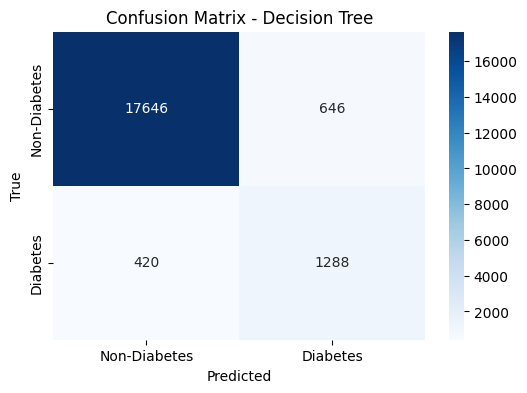

In [ ]:

# Melatih model Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_latih_resampled, y_latih_resampled)

# Prediksi menggunakan model Decision Tree
y_pred_dt = dt.predict(X_uji)

# Menghitung confusion matrix
cm_dt = confusion_matrix(y_uji, y_pred_dt)

# Mengambil komponen confusion matrix
TP_dt = cm_dt[1, 1]  # True Positives
TN_dt = cm_dt[0, 0]  # True Negatives
FP_dt = cm_dt[0, 1]  # False Positives
FN_dt = cm_dt[1, 0]  # False Negatives

# Menghitung metrik evaluasi menggunakan rumus matematika
accuracy_dt = (TP_dt + TN_dt) / (TP_dt + TN_dt + FP_dt + FN_dt)
precision_dt = TP_dt / (TP_dt + FP_dt)
recall_dt = TP_dt / (TP_dt + FN_dt)
f1_score_dt = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt)

# Menambahkan perhitungan Specificity
specificity_dt = TN_dt / (TN_dt + FP_dt)

# Menampilkan hasil evaluasi
print("Confusion Matrix - Decision Tree:")
print(cm_dt)
print(f"\nAkurasi: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_score_dt:.4f}")
print(f"Specificity: {specificity_dt:.4f}")

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
#Melatih model Random Forest
from sklearn.tree import plot_tree
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_latih_resampled, y_latih_resampled)

# Memilih salah satu pohon dari Random Forest (misalnya pohon pertama)
tree_in_rf = rf.estimators_[0]
# Visualisasi pohon keputusan dari Random Forest
plt.figure(figsize=(15, 10))
plot_tree(tree_in_rf, filled=True, feature_names=X.columns, class_names=['Non-Diabetes', 'Diabetes'], rounded=True, proportion=False, precision=2)
plt.title("Visualisasi Pohon Keputusan - Random Forest")
plt.show()

KeyboardInterrupt: 

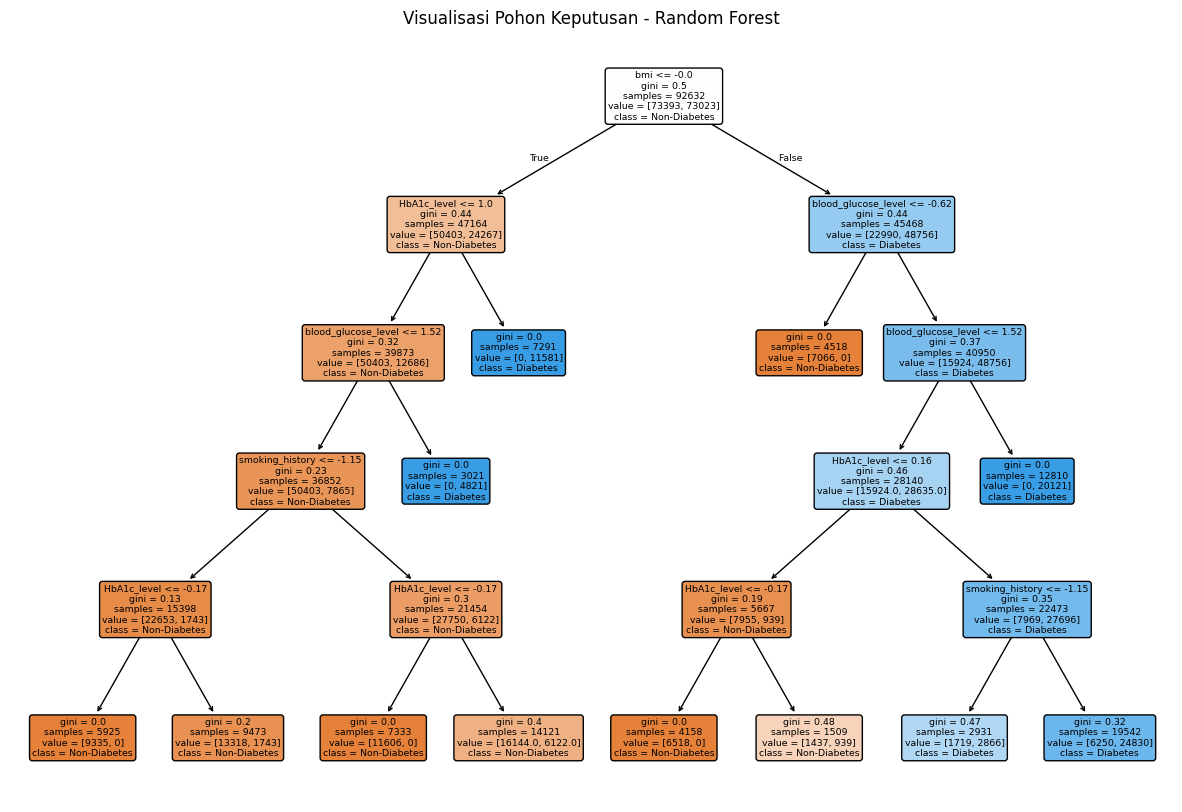

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Melatih model Random Forest dengan membatasi kedalaman pohon
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_latih_resampled, y_latih_resampled)

# Memilih salah satu pohon dari Random Forest (misalnya pohon pertama)
tree_in_rf = rf.estimators_[3]

# Visualisasi pohon keputusan dari Random Forest
plt.figure(figsize=(15, 10))
plot_tree(tree_in_rf, filled=True, feature_names=X.columns, class_names=['Non-Diabetes', 'Diabetes'], rounded=True, proportion=False, precision=2)
plt.title("Visualisasi Pohon Keputusan - Random Forest")
plt.show()


In [ ]:
# Menilai impurity (misalnya Gini) pada setiap node
print("Impurity pada setiap node (Gini):", tree.tree_.impurity)
print("Jumlah sample pada setiap node:", tree.tree_.n_node_samples)
print("Fitur yang digunakan pada setiap node:", tree.tree_.feature)


Impurity pada setiap node (Gini): [0.5        0.45020509 0.36114606 0.16673514 0.02010409 0.
 0.10794052 0.26985941 0.14802156 0.43677951 0.48755671 0.
 0.49410849 0.         0.46021518 0.         0.        ]
Jumlah sample pada setiap node: [146416 111294  95886  53751  24618  20251   4367  29133  19456   9677
  42135  10122  32013   4333  27680  15408  35122]
Fitur yang digunakan pada setiap node: [ 6  7  1  6  6 -2 -2  1 -2 -2  6 -2  7 -2 -2 -2 -2]


In [ ]:
from sklearn.tree import plot_tree

# Melatih model Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_latih_resampled, y_latih_resampled)

# Visualisasi pohon keputusan
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Non-Diabetes', 'Diabetes'], rounded=True, proportion=False, precision=2)
plt.title("Visualisasi Pohon Keputusan - Decision Tree")
plt.show()


NameError: name 'DecisionTreeClassifier' is not defined

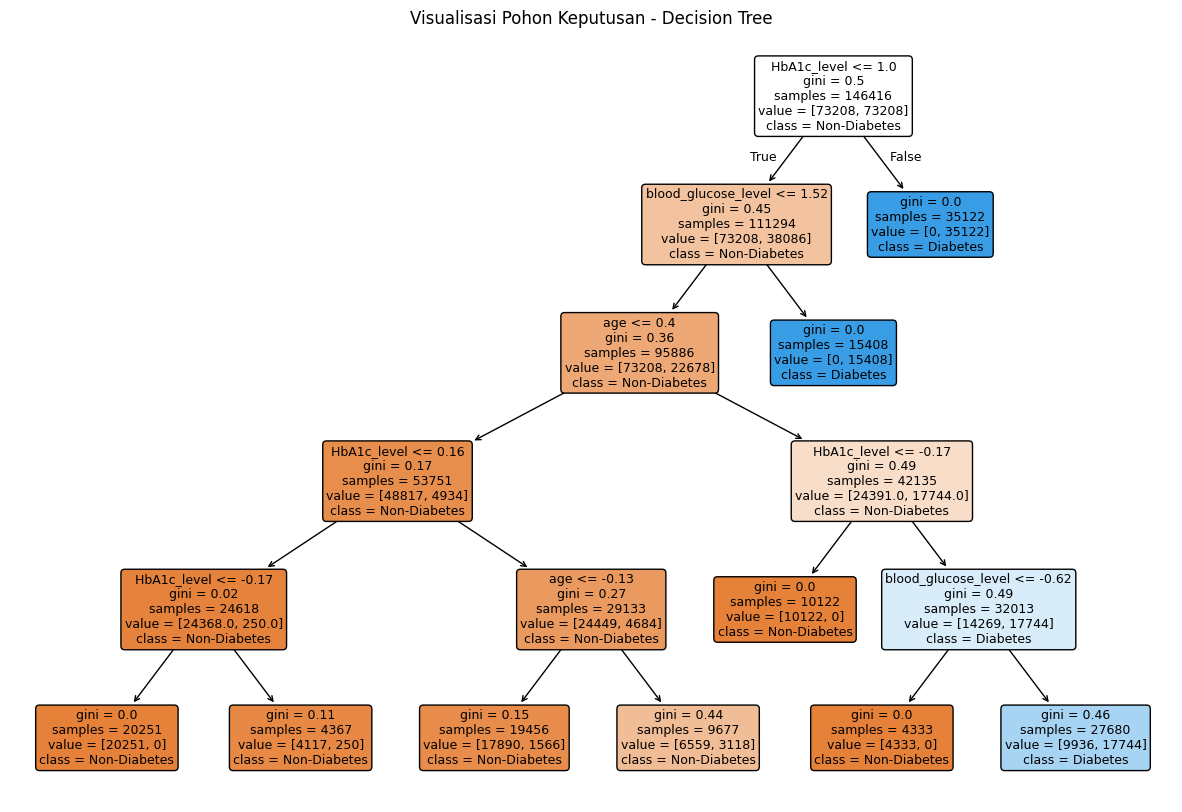

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Melatih model Decision Tree dengan membatasi kedalaman pohon
tree = DecisionTreeClassifier(max_depth=5, random_state=42)  # max_depth diatur untuk membatasi kedalaman pohon
tree.fit(X_latih_resampled, y_latih_resampled)

# Visualisasi pohon keputusan dari Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Non-Diabetes', 'Diabetes'], rounded=True, proportion=False, precision=2)
plt.title("Visualisasi Pohon Keputusan - Decision Tree")
plt.show()


SUB POHON TERBAIK

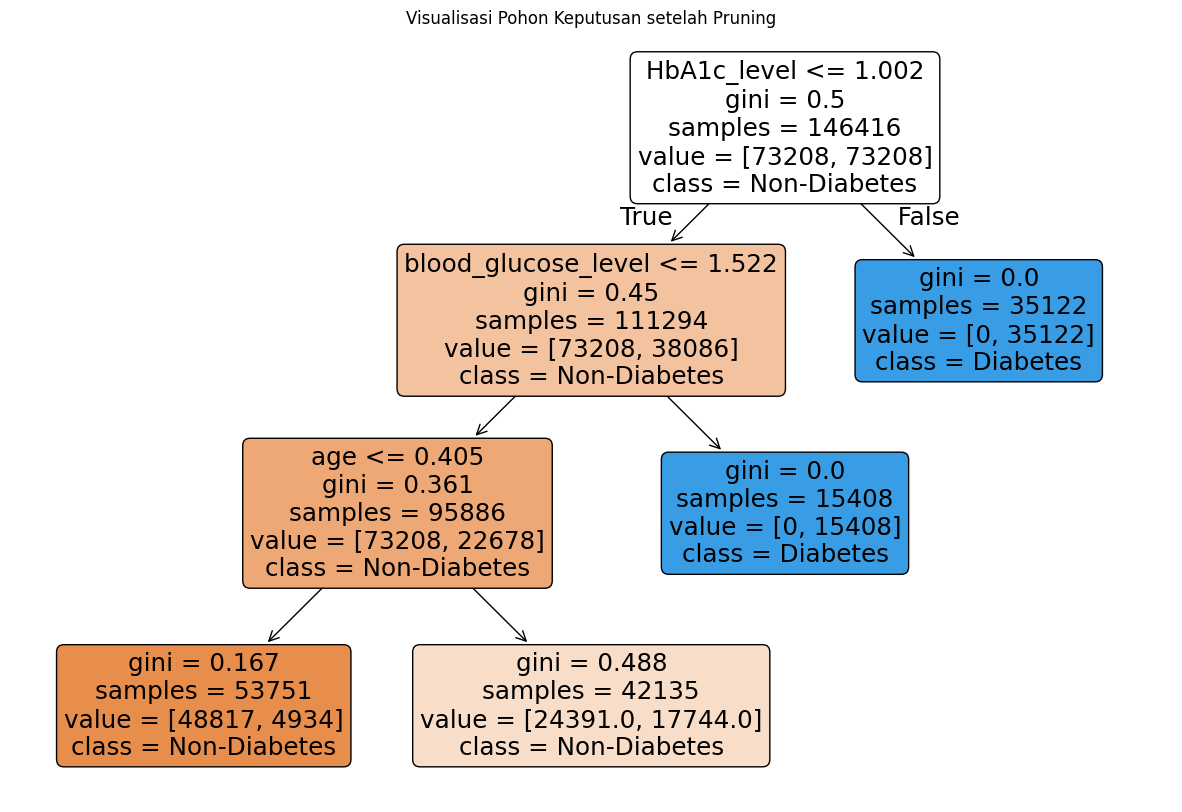

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree dengan parameter yang lebih dikendalikan (max_depth, min_samples_split)
tree_pruned = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=4)  # Batasi kedalaman pohon
tree_pruned.fit(X_latih_resampled, y_latih_resampled)

# Visualisasikan pohon setelah pruning
plt.figure(figsize=(15, 10))
plot_tree(tree_pruned, filled=True, feature_names=X.columns, class_names=['Non-Diabetes', 'Diabetes'], rounded=True)
plt.title("Visualisasi Pohon Keputusan setelah Pruning")
plt.show()

In [ ]:
# Menampilkan fitur yang paling penting dalam Random Forest
feature_importances = rf.feature_importances_
sorted_idx = feature_importances.argsort()

# Menampilkan 10 fitur teratas berdasarkan pentingnya
print("10 Fitur Terpenting:")
for idx in sorted_idx[-10:]:
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")


10 Fitur Terpenting:
gender: 0.0000
age: 0.0000
hypertension: 0.0000
heart_disease: 0.0000
smoking_history: 0.0000
bmi: 0.0000
HbA1c_level: 0.0000
blood_glucose_level: 0.0000


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Memilih salah satu pohon dari Random Forest (misalnya pohon pertama)
tree_in_rf = rf.estimators_[0]

# Visualisasi pohon keputusan pertama
plt.figure(figsize=(15, 10))
plot_tree(tree_in_rf, filled=True, feature_names=X.columns, class_names=['Non-Diabetes', 'Diabetes'], rounded=True)
plt.title("Visualisasi Pohon Keputusan Pertama - Random Forest")
plt.show()


NameError: name 'rf' is not defined

In [ ]:
import pandas as pd

# Nama file tempat data pasien akan disimpan
file_name = 'data_pasien.csv'

# Fungsi untuk menambahkan data pasien baru
def tambah_data_pasien():
    print("Masukkan data pasien berikut:")
    nama = input("Nama: ")
    jenis_kelamin = input("Jenis Kelamin (Male/Female): ")
    hipertensi = int(input("Hipertensi (0: Tidak, 1: Ya): "))
    penyakit_jantung = int(input("Penyakit Jantung (0: Tidak, 1: Ya): "))
    bmi = float(input("BMI (Body Mass Index): "))
    hba1c = float(input("HbA1c Level: "))
    gula_darah = int(input("Kadar Gula Darah: "))

    # Tentukan status diabetes (sederhana berdasarkan kadar gula darah)
    diabetes_status = "Diabetes" if gula_darah > 140 else "Tidak Diabetes"

    # Buat data pasien dalam bentuk dictionary
    data_pasien = {
        "Nama": [nama],
        "Jenis Kelamin": [jenis_kelamin],
        "Hipertensi": [hipertensi],
        "Penyakit Jantung": [penyakit_jantung],
        "BMI": [bmi],
        "HbA1c": [hba1c],
        "Kadar Gula Darah": [gula_darah],
        "Status Diabetes": [diabetes_status]
    }

    # Buat DataFrame dari data pasien
    df_pasien_baru = pd.DataFrame(data_pasien)

    # Jika file belum ada, buat baru; jika sudah ada, tambahkan data
    try:
        df_lama = pd.read_csv(file_name)  # Baca data lama
        df_baru = pd.concat([df_lama, df_pasien_baru], ignore_index=True)  # Gabungkan
        df_baru.to_csv(file_name, index=False)  # Simpan kembali
    except FileNotFoundError:
        df_pasien_baru.to_csv(file_name, index=False)  # Buat file baru

    print("Data pasien berhasil ditambahkan!")

# Fungsi untuk menampilkan semua data pasien
def lihat_data_pasien():
    try:
        df = pd.read_csv(file_name)
        print("\nData Pasien Tersimpan:")
        print(df)
    except FileNotFoundError:
        print("Belum ada data pasien yang tersimpan.")

# Menu utama
while True:
    print("\n=== Sistem Input Data Pasien ===")
    print("1. Tambah Data Pasien")
    print("2. Lihat Data Pasien")
    print("3. Keluar")
    pilihan = input("Pilih opsi (1/2/3): ")

    if pilihan == "1":
        tambah_data_pasien()
    elif pilihan == "2":
        lihat_data_pasien()
    elif pilihan == "3":
        print("Terima kasih! Program selesai.")
        break
    else:
        print("Pilihan tidak valid. Silakan coba lagi.")



=== Sistem Input Data Pasien ===
1. Tambah Data Pasien
2. Lihat Data Pasien
3. Keluar
Pilih opsi (1/2/3): 1
Masukkan data pasien berikut:
Nama: Davina
Jenis Kelamin (Male/Female): Male
Hipertensi (0: Tidak, 1: Ya): 0
Penyakit Jantung (0: Tidak, 1: Ya): 1
BMI (Body Mass Index): 2519
HbA1c Level: 66
Kadar Gula Darah: 140
Data pasien berhasil ditambahkan!

=== Sistem Input Data Pasien ===
1. Tambah Data Pasien
2. Lihat Data Pasien
3. Keluar
Pilih opsi (1/2/3): 2

Data Pasien Tersimpan:
     Nama Jenis Kelamin  Hipertensi  Penyakit Jantung     BMI  HbA1c  \
0  Davina          Male           0                 1  2519.0   66.0   

   Kadar Gula Darah Status Diabetes  
0               140  Tidak Diabetes  

=== Sistem Input Data Pasien ===
1. Tambah Data Pasien
2. Lihat Data Pasien
3. Keluar
Pilih opsi (1/2/3): 1
Masukkan data pasien berikut:
Nama: ANITA HASNA
Jenis Kelamin (Male/Female): FEMALE
Hipertensi (0: Tidak, 1: Ya): 0
Penyakit Jantung (0: Tidak, 1: Ya): 0
BMI (Body Mass Index): 1931

KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd

# Nama file tempat data pasien akan disimpan
file_name = 'data_pasien.csv'

# Fungsi untuk menambahkan data pasien baru
def tambah_data_pasien():
    print("Masukkan data pasien berikut:")
    nama = input("Nama: ")
    jenis_kelamin = input("Jenis Kelamin (Male/Female): ")
    hipertensi = int(input("Hipertensi (0: Tidak, 1: Ya): "))
    penyakit_jantung = int(input("Penyakit Jantung (0: Tidak, 1: Ya): "))
    bmi = float(input("BMI (Body Mass Index): "))
    hba1c = float(input("HbA1c Level: "))
    gula_darah = int(input("Kadar Gula Darah: "))
    age = int(input("Usia (Age): "))  # Tambahkan input usia

    # Riwayat Merokok dengan opsi tambahan
    print("\nPilih Riwayat Merokok:")
    print("1. No Info")
    print("2. Never")
    print("3. Former")
    print("4. Current")
    smoking_history = input("Masukkan nomor pilihan (1/2/3/4): ")

    # Menyimpan pilihan Riwayat Merokok dalam bentuk teks
    if smoking_history == '1':
        smoking_history = 'No Info'
    elif smoking_history == '2':
        smoking_history = 'Never'
    elif smoking_history == '3':
        smoking_history = 'Former'
    elif smoking_history == '4':
        smoking_history = 'Current'
    else:
        smoking_history = 'No Info'  # Default jika input tidak valid

    # Tentukan status diabetes (sederhana berdasarkan beberapa faktor)
    # Logika prediksi sederhana (berdasarkan beberapa faktor risiko)
    if (gula_darah > 140 or hba1c > 6.5 or bmi > 30 or hipertensi == 1 or penyakit_jantung == 1 or age > 45 or smoking_history == 'Current'):
        diabetes_status = "Diabetes"
    else:
        diabetes_status = "Tidak Diabetes"

    # Buat data pasien dalam bentuk dictionary
    data_pasien = {
        "Nama": [nama],
        "Jenis Kelamin": [jenis_kelamin],
        "Hipertensi": [hipertensi],
        "Penyakit Jantung": [penyakit_jantung],
        "BMI": [bmi],
        "HbA1c": [hba1c],
        "Kadar Gula Darah": [gula_darah],
        "Usia": [age],  # Menambahkan usia
        "Riwayat Merokok": [smoking_history],  # Menambahkan riwayat merokok
        "Status Diabetes": [diabetes_status]
    }

    # Buat DataFrame dari data pasien
    df_pasien_baru = pd.DataFrame(data_pasien)

    # Jika file belum ada, buat baru; jika sudah ada, tambahkan data
    try:
        df_lama = pd.read_csv(file_name)  # Baca data lama
        df_baru = pd.concat([df_lama, df_pasien_baru], ignore_index=True)  # Gabungkan
        df_baru.to_csv(file_name, index=False)  # Simpan kembali
    except FileNotFoundError:
        df_pasien_baru.to_csv(file_name, index=False)  # Buat file baru

    print("Data pasien berhasil ditambahkan!")

# Fungsi untuk menampilkan semua data pasien
def lihat_data_pasien():
    try:
        df = pd.read_csv(file_name)
        print("\nData Pasien Tersimpan:")
        print(df)
    except FileNotFoundError:
        print("Belum ada data pasien yang tersimpan.")

# Menu utama
while True:
    print("\n=== Sistem Input Data Pasien ===")
    print("1. Tambah Data Pasien")
    print("2. Lihat Data Pasien")
    print("3. Keluar")
    pilihan = input("Pilih opsi (1/2/3): ")

    if pilihan == "1":
        tambah_data_pasien()
    elif pilihan == "2":
        lihat_data_pasien()
    elif pilihan == "3":
        print("Terima kasih! Program selesai.")
        break
    else:
        print("Pilihan tidak valid. Silakan coba lagi.")



=== Sistem Input Data Pasien ===
1. Tambah Data Pasien
2. Lihat Data Pasien
3. Keluar
Masukkan data pasien berikut:

Pilih Riwayat Merokok:
1. No Info
2. Never
3. Former
4. Current
Data pasien berhasil ditambahkan!

=== Sistem Input Data Pasien ===
1. Tambah Data Pasien
2. Lihat Data Pasien
3. Keluar

Data Pasien Tersimpan:
          Nama Jenis Kelamin  Hipertensi  Penyakit Jantung     BMI   HbA1c  \
0       Davina          Male           0                 1  2519.0    66.0   
1  ANITA HASNA        FEMALE           0                 0  1931.0    65.0   
2      DAVINUY          MALE           1                 1     0.0  6789.0   
3          INT        FEMALE           1                 1   111.0    20.0   
4          DAV          MALE           1                 1    50.0     7.0   

   Kadar Gula Darah Status Diabetes  Usia Riwayat Merokok  
0               140  Tidak Diabetes   NaN             NaN  
1               200        Diabetes   NaN             NaN  
2               789     

In [ ]:
import pandas as pd

# Nama file tempat data pasien akan disimpan
file_name = 'data_pasien.csv'

# Fungsi untuk menambahkan data pasien baru
def tambah_data_pasien():
    print("Masukkan data pasien berikut:")
    nama = input("Nama: ")
    jenis_kelamin = input("Jenis Kelamin (Male/Female): ")
    hipertensi = int(input("Hipertensi (0: Tidak, 1: Ya): "))
    penyakit_jantung = int(input("Penyakit Jantung (0: Tidak, 1: Ya): "))
    bmi = float(input("BMI (Body Mass Index): "))
    hba1c = float(input("HbA1c Level: "))
    gula_darah = int(input("Kadar Gula Darah: "))
    age = int(input("Usia (Age): "))

    # Riwayat Merokok dengan opsi tambahan
    print("\nPilih Riwayat Merokok:")
    print("1. No Info")
    print("2. Never")
    print("3. Former")
    print("4. Current")
    smoking_history = input("Masukkan nomor pilihan (1/2/3/4): ")

    # Menyimpan pilihan Riwayat Merokok dalam bentuk teks
    if smoking_history == '1':
        smoking_history = 'No Info'
    elif smoking_history == '2':
        smoking_history = 'Never'
    elif smoking_history == '3':
        smoking_history = 'Former'
    elif smoking_history == '4':
        smoking_history = 'Current'
    else:
        smoking_history = 'No Info'  # Default jika input tidak valid

    # Tentukan status diabetes (sederhana berdasarkan beberapa faktor)
    # Logika prediksi sederhana (berdasarkan beberapa faktor risiko)
    if (gula_darah > 140 or hba1c > 6.5 or bmi > 30 or hipertensi == 1 or penyakit_jantung == 1 or age > 45 or smoking_history == 'Current'):
        diabetes_status = "Diabetes"
    else:
        diabetes_status = "Tidak Diabetes"

    # Buat data pasien dalam bentuk dictionary
    data_pasien = {
        "Nama": [nama],
        "Jenis Kelamin": [jenis_kelamin],
        "Hipertensi": [hipertensi],
        "Penyakit Jantung": [penyakit_jantung],
        "BMI": [bmi],
        "HbA1c": [hba1c],
        "Kadar Gula Darah": [gula_darah],
        "Usia": [age],
        "Riwayat Merokok": [smoking_history],
        "Status Diabetes": [diabetes_status]
    }

    # Buat DataFrame dari data pasien
    df_pasien_baru = pd.DataFrame(data_pasien)

    # Jika file belum ada, buat baru; jika sudah ada, tambahkan data
    try:
        df_lama = pd.read_csv(file_name)  # Baca data lama
        df_baru = pd.concat([df_lama, df_pasien_baru], ignore_index=True)  # Gabungkan
        df_baru.to_csv(file_name, index=False)  # Simpan kembali
    except FileNotFoundError:
        df_pasien_baru.to_csv(file_name, index=False)  # Buat file baru

    print("Data pasien berhasil ditambahkan!")

# Fungsi untuk menampilkan semua data pasien
def lihat_data_pasien():
    try:
        df = pd.read_csv(file_name)
        print("\nData Pasien Tersimpan:")
        print(df)
    except FileNotFoundError:
        print("Belum ada data pasien yang tersimpan.")

# Menu utama
while True:
    print("\n=== Sistem Input Data Pasien ===")
    print("1. Tambah Data Pasien")
    print("2. Lihat Data Pasien")
    print("3. Keluar")
    pilihan = input("Pilih opsi (1/2/3): ")

    if pilihan == "1":
        tambah_data_pasien()
    elif pilihan == "2":
        lihat_data_pasien()
    elif pilihan == "3":
        print("Terima kasih! Program selesai.")
        break
    else:
        print("Pilihan tidak valid. Silakan coba lagi.")


In [ ]:
import pandas as pd

# Menyimpan data sementara dalam list (selama sesi berjalan)
data_list = []

# Fungsi untuk menambahkan data pasien
def tambah_data_pasien():
    print("Masukkan data pasien berikut:")
    nama = input("Nama: ")
    jenis_kelamin = input("Jenis Kelamin (Male/Female): ")
    hipertensi = int(input("Hipertensi (0: Tidak, 1: Ya): "))
    penyakit_jantung = int(input("Penyakit Jantung (0: Tidak, 1: Ya): "))
    bmi = float(input("BMI (Body Mass Index): "))
    hba1c = float(input("HbA1c Level: "))
    gula_darah = int(input("Kadar Gula Darah: "))
    age = int(input("Usia (Age): "))

    # Riwayat Merokok dengan opsi tambahan
    print("\nPilih Riwayat Merokok:")
    print("1. No Info")
    print("2. Never")
    print("3. Former")
    print("4. Current")
    smoking_history = input("Masukkan nomor pilihan (1/2/3/4): ")

    # Menyimpan pilihan Riwayat Merokok dalam bentuk teks
    if smoking_history == '1':
        smoking_history = 'No Info'
    elif smoking_history == '2':
        smoking_history = 'Never'
    elif smoking_history == '3':
        smoking_history = 'Former'
    elif smoking_history == '4':
        smoking_history = 'Current'
    else:
        smoking_history = 'No Info'  # Default jika input tidak valid

    # Tentukan status diabetes (sederhana berdasarkan beberapa faktor)
    if (gula_darah > 140 or hba1c > 6.5 or bmi > 30 or hipertensi == 1 or penyakit_jantung == 1 or age > 45 or smoking_history == 'Current'):
        diabetes_status = "Diabetes"
    else:
        diabetes_status = "Tidak Diabetes"

    # Menyimpan data ke dalam list sementara
    data_pasien = {
        "Nama": nama,
        "Jenis Kelamin": jenis_kelamin,
        "Hipertensi": hipertensi,
        "Penyakit Jantung": penyakit_jantung,
        "BMI": bmi,
        "HbA1c": hba1c,
        "Kadar Gula Darah": gula_darah,
        "Usia": age,
        "Riwayat Merokok": smoking_history,
        "Status Diabetes": diabetes_status
    }
    data_list.append(data_pasien)
    print("Data pasien berhasil ditambahkan!")

# Fungsi untuk menulis data ke CSV setelah sesi
def simpan_data():
    # Konversi data sementara ke DataFrame
    df = pd.DataFrame(data_list)
    # Menyimpan data ke CSV
    df.to_csv('data_pasien.csv', index=False)
    print("Data berhasil disimpan ke file CSV!")

# Fungsi untuk melihat data pasien
def lihat_data_pasien():
    try:
        df = pd.read_csv('data_pasien.csv')
        print("\nData Pasien Tersimpan:")
        print(df)
    except FileNotFoundError:
        print("Belum ada data pasien yang tersimpan.")

# Menu utama
while True:
    print("\n=== Sistem Input Data Pasien ===")
    print("1. Tambah Data Pasien")
    print("2. Lihat Data Pasien")
    print("3. Simpan Data dan Keluar")
    pilihan = input("Pilih opsi (1/2/3): ")

    if pilihan == "1":
        tambah_data_pasien()
    elif pilihan == "2":
        lihat_data_pasien()
    elif pilihan == "3":
        simpan_data()
        print("Terima kasih! Program selesai.")
        break
    else:
        print("Pilihan tidak valid. Silakan coba lagi.")
